# N6. 
Uno de los mayores problemas de las reviews es que los usuarios tienen distintas escalas en puntaje para las mismas experiencias, entonces las estrellas que suele dejar un usuario no son comparables con las otro. Para normalizar un poco más esto, Yelp quiere que el usuario primero escriba el texto y según qué tan positivo o negativo sea sugerirle la cantidad de estrellas a dejar. vaderSentiment y textblob de python son dos librerías para analizar sentimientos, ambas pueden darnos un score de que tan positivo o negativo es el sentimiento de un texto. Para los textos reviews, cuál de los dos scores de emoción mejor correlaciona con el puntaje que esa review deja?

In [24]:
import pandas as pd
import numpy as np

reviews = pd.read_csv('Dataset/review.csv', usecols=['stars', 'text'])

In [6]:
reviews.head()

,stars,text
0,3.0,"If you decide to eat here, just be aware it is..."
1,4.0,Cute interior and owner (?) gave us tour of up...
2,4.0,I was really between 3 and 4 stars for this on...
3,5.0,First time there and it was excellent!!! It fe...
4,5.0,"Great burgers,fries and salad! Burgers have a..."


In [26]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3838105 entries, 0 to 3838104
Data columns (total 2 columns):
 #   Column  Dtype  
---  ------  -----  
 0   stars   float64
 1   text    object 
dtypes: float64(1), object(1)
memory usage: 58.6+ MB


In [7]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [11]:
analyzer = SentimentIntensityAnalyzer()

# reviews['vaderSentiment_compound'] = reviews['text'].transform(lambda x: analyzer.polarity_scores(x)['compound'])
vaderSentiment_compound = reviews.head()['text'].transform(lambda x: analyzer.polarity_scores(x)['compound'])
vaderSentiment_compound

In [22]:
from textblob import TextBlob
# reviews['TextBlob'] = reviews['text'].transform(lambda x: TextBlob(x).sentiment)
textblobdata = reviews.head()['text'].transform(lambda x: TextBlob(x).sentiment.polarity)
textblobdata

0    0.085278
1    0.400969
2    0.254333
3    0.438737
4    0.315000
Name: text, dtype: float64

In [20]:
textblobdata = reviews.head()['text'].transform(lambda x: f"{TextBlob(x).sentiment.polarity}-{analyzer.polarity_scores(x)['compound']}")
textblobdata

0    0.08527777777777777-0.8597
1    0.40096938775510205-0.9815
2    0.25433333333333336-0.9726
3     0.43873697916666665-0.941
4                  0.315-0.8655
Name: text, dtype: object

In [44]:
df = reviews.sample(10000)  # Para saber cual es el mejor tomo una muestra, podria tomar todos pero el transform se haria eterno

In [45]:
# hago ambos al mismo tiempo para no tener que recorrer dos veces el set de datos
df['analysis'] = df['text'].transform(lambda x: f"{TextBlob(x).sentiment.polarity};{analyzer.polarity_scores(x)['compound']}")
df.head()

,stars,text,analysis
1616423,4.0,More of a 3.5 stars but gave extra for the atm...,0.25999999999999995;0.9103
1329564,5.0,"If you ask me what my favorite food is, i'll t...",0.21132154882154883;0.9545
1916881,5.0,Worth the drive from anywhere in Nashville. Aw...,0.5333333333333334;0.9349
1315035,1.0,Went here a few years ago to have my exhaust f...,0.08452380952380953;-0.8807
1181505,1.0,Really good idea conceptually and awesome atmo...,0.11969696969696969;-0.7229


In [46]:
df[['TextBlob', 'vaderSentiment']] = df['analysis'].str.split(';', 1, expand=True)

In [47]:
df.head()

,stars,text,analysis,TextBlob,vaderSentiment
1616423,4.0,More of a 3.5 stars but gave extra for the atm...,0.25999999999999995;0.9103,0.25999999999999995,0.9103
1329564,5.0,"If you ask me what my favorite food is, i'll t...",0.21132154882154883;0.9545,0.21132154882154883,0.9545
1916881,5.0,Worth the drive from anywhere in Nashville. Aw...,0.5333333333333334;0.9349,0.5333333333333334,0.9349
1315035,1.0,Went here a few years ago to have my exhaust f...,0.08452380952380953;-0.8807,0.08452380952380953,-0.8807
1181505,1.0,Really good idea conceptually and awesome atmo...,0.11969696969696969;-0.7229,0.11969696969696969,-0.7229


In [48]:
df['TextBlob'] = pd.to_numeric(df['TextBlob'], downcast="float")
df['vaderSentiment'] = pd.to_numeric(df['vaderSentiment'], downcast="float")

In [49]:
del(df['analysis'])
del(df['text'])

In [50]:
df.corr()

,stars,TextBlob,vaderSentiment
stars,1.000000,0.663929,0.700489
TextBlob,0.663929,1.000000,0.645774
vaderSentiment,0.700489,0.645774,1.000000


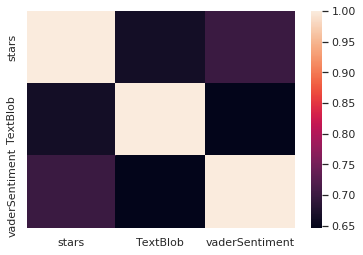

In [51]:
import seaborn as sns; sns.set_theme()
ax = sns.heatmap(df.corr())

# Respuesta
Según esta muestra la que mejor correlaciona con las estrellas que asignó cada usuario es la librería vaderSentiment.